In [1]:
#from qiskit_ibm_runtime import QiskitRuntimeService

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt


from qiskit_ibm_provider import IBMProvider


import qiskit
from qiskit import IBMQ

from qiskit import(
  QuantumCircuit,
  execute,
  Aer)

from qiskit.visualization import plot_histogram

from qiskit import QuantumRegister, QuantumCircuit

from qiskit.result import marginal_counts
from qiskit.circuit import QuantumRegister, ClassicalRegister
import qiskit.quantum_info as qi

import time

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.circuit.library.standard_gates import C3XGate

from qiskit import QuantumCircuit, transpile


In [3]:

#IBMProvider.delete_account()
# Save your credentials on disk.

IBMProvider.save_account(token='9df3d08e98f7165f34e86a1840a79cc509e130e7c9cf9ac9d1cac48eed49c91ed3b0d2421ca7b20482352fa82996b1c716364d883a9d180a94fd3d331e4d5cd8', overwrite = True)
provider = IBMQ.load_account()
my_provider = IBMProvider(instance='ibm-q-howard/internal/ashley-blackwell')
#my_provider.backends()

/var/folders/vn/5ygt8j3x24j61lcq66x89txc0000gn/T/ipykernel_15277/1330306479.py:5: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()
/var/folders/vn/5ygt8j3x24j61lcq66x89txc0000gn/T/ipykernel_15277/1330306479.py:5: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  provider = IBMQ.load_account()


In [4]:
print(IBMQ.providers())

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>, <AccountProvider for IBMQ(hub='ibm-q-howard', group='internal', project='ashley-blackwell')>, <AccountProvider for IBMQ(hub='ibm-q-howard', group='hbcu-qc-year-2', project='aamu-hbcu-quantu')>]


In [5]:
provider = IBMQ.get_provider(hub='ibm-q-howard', project = 'ashley-blackwell')
print(provider.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-howard', group='internal', project='ashley-blackwell')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q-howard', group='internal', project='ashley-blackwell')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q-howard', group='internal', project='ashley-blackwell')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q-howard', group='internal', project='ashley-blackwell')>, <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q-howard', group='internal', project='ashley-blackwell')>, <IBMQBackend('ibm_cairo') from IBMQ(hub='ibm-q-howard', group='internal', project='ashley-blackwell')>, <IBMQBackend('ibm_nazca') from IBMQ(hub='ibm-q-howard', group='internal', project='ashley-blackwell')>, <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q-howard', group='internal', project='ashley-blackwell')>]


In [6]:
backend = my_provider.get_backend('ibm_nazca')

In [7]:
P0p=QuantumCircuit(5,name="$P_0^{+}$")

P0p.id(0)
P0p.id(1)
P0p.id(2)
P0p.id(3)
P0p.id(4)

P0m=QuantumCircuit(5,name="$P_0^{-}$")


P0m.x(0)
P0m.x(1)
P0m.x(2)
P0m.cx(4,0)



P1p=QuantumCircuit(5,name="$P_1^{+}$")
P1p.x(2)
P1p.x(3)
P1p.x(4)


P1m=QuantumCircuit(5,name="$P_1^{m}$")
P1m.ccx(3,2,0)
P1m.x(1)

P2p=QuantumCircuit(5,name="$P_2^{+}$")
P2p.ccx(3,2,0)
P2p.x(2)

P2m=QuantumCircuit(5,name="$P_2^{-}$")
P2m.cx(1,0)


P3p=QuantumCircuit(5,name="$P_3^{+}$")
P3p.ccx(2,1,0)
P3p.x(0) 
P3p.x(1)
P3p.ccx(2,1,0)
P3p.x(1)

#Erin start here

P3m=QuantumCircuit(5,name="$P_3^{-}$")
P3m.x(1)
P3m.x(2)
P3m.x(4)

P4p=QuantumCircuit(5,name="$P_4^{+}$")
P4p.ccx(4,3,2)
P4p.x(2)
P4p.x(3)

P4m=QuantumCircuit(5,name="$P_4^{-}$")
P4m.ccx(3,2,1)
P4m.ccx(3,2,1)
P4m.x(1)

#ERIN KEPT GOING HERE

P5p=QuantumCircuit(5,name="$P_5^{+}$")
P5p.cx(2,0)
P5p.cx(1,0)
P5p.x(1)

P5m=QuantumCircuit(5,name="$P_5^{-}$")
P5m.cx(2,0)
P5m.x(1)
P5m.cx(3,2)

P6p=QuantumCircuit(5,name="$P_6^{+}$")
P6p.ccx(3,2,0)
P6p.x(2)
P6p.x(3)

P6m=QuantumCircuit(5,name="$P_6^{-}$")
P6m.cx(1,0)
P6m.ccx(4,3,2)
P6m.x(0)

P7p=QuantumCircuit(5,name="$P_7^{+}$")
P7p.cx(1,0)
P7p.x(2)
P7p.ccx(3,2,0)
P7p.x(1)


P7m=QuantumCircuit(5,name="$P_7^{-}$")
P7m.x(0)
P7m.x(1)
P7m.x(2)
P7m.x(3)
P7m.x(4)

P8p=QuantumCircuit(5,name="$P_8^{+}$")
P8p.x(0)
P8p.x(3)


P8m=QuantumCircuit(5,name="$P_8^{-}$")
P8m.x(0)
P8m.x(1)
P8m.cx(4,3)

P9p=QuantumCircuit(5,name="$P_9^{+}$")
P9p.x(0)
P9p.x(1)
P9p.x(2)
P9p.cx(1,0)

P9m=QuantumCircuit(5,name="$P_9^{-}$")
P9m.x(0)
P9m.x(1)
P9m.cx(4,3)
P9m.cx(2,0)

#not sure of the ordering here? is it (x)1,2,4 or 2,4,1 ? same w/10-
P10p=QuantumCircuit(5,name="$P_10^{+}$")
P10p.cx(1,0)
P10p.x(2)
P10p.x(4)
P10p.x(1)

P10m=QuantumCircuit(5,name="$P_10^{-}$")
P10m.cx(1,0)
P10m.x(4)
P10m.x(1)
P10m.x(1)


P11p=QuantumCircuit(5,name="$P_11^{+}$")
P11p.ccx(3,2,1)
P11p.ccx(3,2,1)

P11m=QuantumCircuit(5,name="$P_11^{-}$")
P11m.cx(3,0)
P11m.cx(2,0)
P11m.cx(1,0)
P11m.x(2)

P12p=QuantumCircuit(5,name="$P_12^{+}$")
#P12p.append(C3XGate(), [3,2,1,0]) not sure if you need this append line but just in case
P12p.ccx(2,1,0)
P12p.cx(2,1)
P12p.x(2)

P12m=QuantumCircuit(5,name="$P_12^{-}$")
P12m.x(0)
P12m.x(1)
P12m.x(2)


P13p=QuantumCircuit(5,name="$P_13^{+}$")
P13p.ccx(3,2,0)
P13p.x(0)
P13p.x(2)


P13m=QuantumCircuit(5,name="$P_13^{-}$")
#P13m.append(C3XGate(), [3,2,1,0]) again idk if you needed this
P13m.ccx(2,1,0)
P13m.ccx(2,1,0)
P13m.x(1)

P14p=QuantumCircuit(5,name="$P_14^{+}$")
P14p.x(0)
P14p.x(1)
P14p.cx(1,0)

P14m=QuantumCircuit(5,name="$P_14^{-}$")
P14m.x(0)
P14m.x(1)
P14m.cx(3,2)

P15p=QuantumCircuit(5,name="$P_15^{+}$")
P15p.cx(1,0)
P15p.x(0)
P15p.x(1)

P15m=QuantumCircuit(5,name="$P_15^{-}$")
P15m.x(0)
P15m.x(1)
P15m.x(2)
P15m.x(0)
P15m.cx(3,2)


P16p=QuantumCircuit(5,name="$P_16^{+}$")
P16p.cx(1,0)
P16p.cx(3,2)
P16p.x(0)
P16p.x(1)


P16m=QuantumCircuit(5,name="$P_16^{-}$")
P16m.cx(1,0)
P16m.cx(3,2)
P16m.x(0)
P16m.x(2)

P17p=QuantumCircuit(5,name="$P_17^{+}$")
P17p.cx(1,0)
P17p.cx(3,2)
P17p.x(0)
P17p.x(1)
P17p.x(2)


P17m=QuantumCircuit(5,name="$P_17^{-}$")
P17m.cx(1,0)
P17m.cx(3,2)
P17m.x(0)
P17m.x(1)
P17m.x(1)

P18p=QuantumCircuit(5,name="$P_18^{+}$")
P18p.cx(1,0)
P18p.x(1)

P18m=QuantumCircuit(5,name="$P_18^{-}$")
P18m.cx(1,0)
P18m.x(0)

P19p=QuantumCircuit(5,name="$P_19^{+}$")
P19p.cx(1,0)
P19p.cx(3,2)
P19p.x(1)

P19m=QuantumCircuit(5,name="$P_19^{-}$")
P19m.cx(1,0)
P19m.cx(3,2)
P19m.x(4)

P20p=QuantumCircuit(5,name="$P_20^{+}$")
P20p.cx(1,0)
P20p.cx(3,2)
P20p.x(4)
P20p.cx(1,0)

P20m=QuantumCircuit(5,name="$P_20^{-}$")
P20m.cx(1,0)
P20m.x(3)
P20m.cx(3,2)

P21p=QuantumCircuit(5,name="$P_21^{+}$")
P21p.cx(1,0)
P21p.cx(3,2)
P21p.cx(1,0)

P21m=QuantumCircuit(5,name="$P_21^{-}$")
P21m.cx(1,0)
P21m.cx(4,3)
P21m.cx(3,2)

P22p=QuantumCircuit(5,name="$P_22^{+}$")
P22p.cx(1,0)
P22p.cx(4,3)
P22p.cx(1,0)
P22p.cx(3,2)


P22m=QuantumCircuit(5,name="$P_22^{-}$")
P22m.cx(1,0)
P22m.cx(4,3)
P22m.cx(3,2)
P22m.cx(4,3)

P23p=QuantumCircuit(5,name="$P_23^{+}$")
P23p.ccx(2,1,0)
P23p.cx(4,3)
P23p.cx(2,1)

P23m=QuantumCircuit(5,name="$P_23^{-}$")
P23m.cx(1,0)
P23m.cx(4,3)
P23m.cx(3,2)
P23m.ccx(4,3,2)


P24p=QuantumCircuit(5,name="$P_24^{+}$")
P24p.cx(1,0)
P24p.cx(3,2)
P24p.cx(1,0)
P24p.ccx(4,3,2)


P24m=QuantumCircuit(5,name="$P_24^{-}$")
P24m.ccx(2,1,0)
P24m.cx(2,1)
P24m.cx(1,0)

P25p=QuantumCircuit(5,name="$P_25^{+}$")
P25p.ccx(2,1,0)
P25p.x(1)
P25p.cx(2,1)
P25p.cx(1,0)


P25m=QuantumCircuit(5,name="$P_25^{-}$")
P25m.ccx(2,1,0)
P25m.cx(2,1)
P25m.x(1)
P25m.cx(3,2)

P26p=QuantumCircuit(5,name="$P_26^{+}$")
P26p.ccx(2,1,0)
P26p.x(0)
P26p.cx(2,1)

P26m=QuantumCircuit(5,name="$P_26^{-}$")
P26m.ccx(2,1,0)
P26m.x(0)
P26m.cx(2,1)
P26m.cx(1,0)

P27p=QuantumCircuit(5,name="$P_27^{+}$")
P27p.ccx(2,1,0)
P27p.cx(4,3)
P27p.ccx(2,1,0)


P27m=QuantumCircuit(5,name="$P_27^{-}$")
P27m.ccx(2,1,0)
P27m.ccx(2,1,0)
P27m.cx(1,0)

P28p=QuantumCircuit(5,name="$P_28^{+}$")
P28p.ccx(2,1,0)
P28p.x(0)
P28p.ccx(2,1,0)

P28m=QuantumCircuit(5,name="$P_28^{-}$")
P28m.cx(1,0)
P28m.ccx(4,3,2)

P29p=QuantumCircuit(5,name="$P_29^{+}$")
P29p.ccx(2,1,0)
P29p.cx(2,1)

P29m=QuantumCircuit(5,name="$P_29^{-}$")
P29m.cx(1,0)
P29m.ccx(2,1,0)
P29m.cx(2,1)

P30p=QuantumCircuit(5,name="$P_30^{+}$")
P30p.x(2)
P30p.ccx(2,1,0)
P30p.cx(2,1)

P30m=QuantumCircuit(5,name="$P_30^{-}$")
P30p.ccx(2,1,0)
P30p.cx(2,1)
P30p.x(1)


P31p=QuantumCircuit(5,name="$P_31^{+}$")
P31p.x(0)
P31p.cx(2,1)
P31p.ccx(2,1,0)


P31m=QuantumCircuit(5,name="$P_31^{-}$")
P31m.cx(1,0)
P31m.ccx(4,3,2)
P31m.x(0)

P32p=QuantumCircuit(5,name="$P_32^{+}$")
P32p.ccx(4,3,2)
P32p.ccx(2,1,0)
P32p.cx(2,1)

P32m=QuantumCircuit(5,name="$P_32^{-}$")
P32m.ccx(3,2,1)
P32m.cx(1,0)
P32m.x(0)
P32m.ccx(3,2,1)

P33p=QuantumCircuit(5,name="$P_33^{+}$")
P33p.ccx(2,1,0)
P33p.ccx(4,3,2)
P33p.ccx(2,1,0)

P33m=QuantumCircuit(5,name="$P_33^{-}$")
P33m.cx(1,0)
P33m.x(2)
P33m.x(4)
P33m.ccx(4,3,2)

P34p=QuantumCircuit(5,name="$P_34^{+}$")
P34p.cx(1,0)
P34p.x(2)
P34p.x(4)
P34p.cx(1,0)
P34p.ccx(4,3,2)

P34m=QuantumCircuit(5,name="$P_34^{-}$")
P34m.x(0)
P34m.ccx(4,3,2)
P34m.cx(1,0)
P34m.ccx(4,3,2)

P35p=QuantumCircuit(5,name="$P_35^{+}$")
P35p.x(0)
P35p.cx(2,1)
P35p.ccx(2,1,0)
P35p.ccx(4,3,2)

P35m=QuantumCircuit(5,name="$P_35^{-}$")
P35m.cx(3,2)
P35m.ccx(2,1,0)
P35m.cx(4,3)
P35m.x(2)
P35m.ccx(2,1,0)

P36p=QuantumCircuit(5,name="$P_36^{+}$")
P36p.ccx(2,1,0)
P36p.cx(4,3)
P36p.cx(1,0)
P36p.x(2)
P36p.ccx(2,1,0)

P36m=QuantumCircuit(5,name="$P_36^{-}$")
P36m.cx(1,0)
P36m.ccx(4,3,2)

P37p=QuantumCircuit(5,name="$P_37^{+}$")
P37p.cx(1,0)
P37p.cx(3,2)
P37p.ccx(2,1,0)
P37p.x(2)
P37p.ccx(2,1,0)

P37m=QuantumCircuit(5,name="$P_37^{-}$")
P37m.cx(1,0)
P37m.ccx(4,3,2)
P37m.ccx(4,3,2)

P38p=QuantumCircuit(5,name="$P_38^{+}$")
P38p.ccx(4,3,2)
P38p.cx(4,3)

P38m=QuantumCircuit(5,name="$P_38^{-}$")
P38m.ccx(2,1,0)
P38m.ccx(2,1,0)
P38m.cx(1,0)

P39p=QuantumCircuit(5,name="$P_39^{+}$")
P39p.ccx(2,1,0)
P39p.x(4)
P39p.cx(2,1)
P39p.ccx(4,3,2)

P39m=QuantumCircuit(5,name="$P_39^{-}$")
P39m.ccx(2,1,0)
P39m.x(3)
P39m.ccx(2,1,0)
P39m.cx(1,0)

P40p=QuantumCircuit(5,name="$P_40^{+}$")
P40p.ccx(4,3,2)
P40p.x(2)
P40p.cx(4,3)

P40m=QuantumCircuit(5,name="$P_40^{-}$")
P40m.cx(1,0)
P40m.x(3)

P41p=QuantumCircuit(5,name="$P_41^{+}$")
P41p.cx(3,2)
P41p.ccx(4,3,2)
P41p.x(3)

P41m=QuantumCircuit(5,name="$P_41^{-}$")
P41m.x(1)
P41m.cx(3,2)
P41m.ccx(4,3,2)

P42p=QuantumCircuit(5,name="$P_42^{+}$")
P42p.cx(3,2)
P42p.ccx(4,3,2)
P42p.x(4)

P42m=QuantumCircuit(5,name="$P_42^{-}$")
P42m.cx(1,0)
P42m.ccx(4,3,2)
P42m.x(0)
P42m.x(2)

P43p=QuantumCircuit(5,name="$P_43^{+}$")
P43p.x(0)
P43p.cx(3,2)
P43p.ccx(4,3,2)

P43m=QuantumCircuit(5,name="$P_43^{-}$")
P43m.cx(1,0)
P43m.ccx(4,3,2)
P43m.x(2)

P44p=QuantumCircuit(5,name="$P_44^{+}$")
P44p.x(0)
P44p.cx(2,1)
P44p.ccx(2,1,0)

P44m=QuantumCircuit(5,name="$P_44^{-}$")
P44m.cx(1,0)
P44m.ccx(4,3,2)
P44m.x(3)

P45p=QuantumCircuit(5,name="$P_45^{+}$")
P45p.ccx(4,3,2)
P45p.x(0)
P45p.cx(2,1)

P45m=QuantumCircuit(5,name="$P_45^{-}$")
P45m.cx(1,0)
P45m.ccx(4,3,2)
P45m.x(4)

P46p=QuantumCircuit(5,name="$P_46^{+}$")
P46p.ccx(2,1,0)
P46p.x(0)
P46p.cx(2,1)

P46m=QuantumCircuit(5,name="$P_46^{-}$")
P46m.cx(1,0)
P46m.ccx(4,3,2)
P46m.x(0)

P47p=QuantumCircuit(5,name="$P_47^{+}$")
P47p.x(0)
P47p.cx(4,3)
P47p.ccx(4,3,2)

P47m=QuantumCircuit(5,name="$P_47^{-}$")
P47m.x(0)
P47m.ccx(4,3,2)
P47m.cx(1,0)

P48p=QuantumCircuit(5,name="$P_48^{+}$")
P48p.cx(4,3)
P48p.ccx(4,3,2)
P48p.x(2)

P48m=QuantumCircuit(5,name="$P_48^{-}$")
P48m.x(0)
P48m.x(1)
P48m.x(2)

P49p=QuantumCircuit(5,name="$P_49^{+}$")
P49p.cx(1,0)
P49p.ccx(4,3,2)
P49p.x(1)

P49m=QuantumCircuit(5,name="$P_49^{-}$")
P49m.x(0)
P49m.x(1)
P49m.cx(3,2)

P50p=QuantumCircuit(5,name="$P_50^{+}$")
P50p.cx(4,3)
P50p.ccx(4,3,2)
P50p.x(3)

P50m=QuantumCircuit(5,name="$P_50^{-}$")
P50m.cx(1,0)
P50m.x(4)
P50m.x(1)
P50m.x(1)

P51p=QuantumCircuit(5,name="$P_51^{+}$")
P51p.cx(4,3)
P51p.ccx(4,3,2)
P51p.x(4)

P51m=QuantumCircuit(5,name="$P_51^{-}$")
#P51m.appendC3XGate()(3,2,1,0)
P51m.ccx(2,1,0)
P51m.cx(1,0)
P51m.x(2)


P52p=QuantumCircuit(5,name="$P_52^{+}$")
P52p.cx(4,3)
P52p.x(4)
P52p.ccx(4,3,2)

P52m=QuantumCircuit(5,name="$P_52^{-}$")
P52m.x(0)
P52m.x(1)
P52m.x(2)

P53p=QuantumCircuit(5,name="$P_53^{+}$")
P53p.x(0)
P53p.cx(4,3)
P53p.ccx(4,3,2)

P53m=QuantumCircuit(5,name="$P_53^{-}$")
P53m.ccx(2,1,0)
P53m.ccx(2,1,0)
P53m.x(1)

P54p=QuantumCircuit(5,name="$P_54^{+}$")
P54p.ccx(4,3,2)
P54p.x(3)
P54p.cx(4,3)

P54m=QuantumCircuit(5,name="$P_54^{-}$")
P54m.x(0)
P54m.x(1)
P54m.x(2)
P54m.x(0)
P54m.cx(3,2)

P55p=QuantumCircuit(5,name="$P_55^{+}$")
P55p.cx(3,2)
P55p.ccx(4,3,2)
P55p.x(2)

P55m=QuantumCircuit(5,name="$P_55^{-}$")
P55m.x(0)
P55m.x(1)
P55m.x(2)
P55m.cx(3,2)

P56p=QuantumCircuit(5,name="$P_56^{+}$")
P56p.x(2)
P56p.cx(2,1)
P56p.ccx(2,1,0)

P56m=QuantumCircuit(5,name="$P_56^{-}$")
P56m.cx(1,0)
P56m.cx(3,2)
P56m.x(0)
P56m.x(2)

P57p=QuantumCircuit(5,name="$P_57^{+}$")
P57p.cx(1,0)
P57p.cx(3,2)
P57p.x(0)
P57p.x(1)
P57p.x(2)

P57m=QuantumCircuit(5,name="$P_57^{-}$")
P57m.cx(1,0)
P57m.cx(3,2)
P57m.x(0)
P57m.x(1)
P57m.x(1)

P58p=QuantumCircuit(5,name="$P_58^{+}$")
P58p.cx(1,0)
P58p.x(1)

P58m=QuantumCircuit(5,name="$P_58^{-}$")
P58m.cx(1,0)
P58m.x(0)

P59p=QuantumCircuit(5,name="$P_59^{+}$")
P59p.cx(1,0)
P59p.cx(3,2)
P59p.x(1)

P59m=QuantumCircuit(5,name="$P_59^{-}$")
P59m.cx(1,0)
P59m.cx(3,2)
P59m.x(4)

P60p=QuantumCircuit(5,name="$P_60^{+}$")
P60p.cx(1,0)
P60p.cx(3,2)
P60p.x(4)
P60p.cx(1,0)

P60m=QuantumCircuit(5,name="$P_60^{-}$")
P60m.cx(1,0)
P60m.x(3)
P60m.cx(3,2)

P61p=QuantumCircuit(5,name="$P_61^{+}$")
P61p.cx(1,0)
P61p.cx(3,2)
P61p.cx(1,0)

P61m=QuantumCircuit(5,name="$P_61^{-}$")
P61m.cx(1,0)
P61m.cx(4,3)
P61m.cx(3,2)

P62p=QuantumCircuit(5,name="$P_62^{+}$")
P62p.cx(1,0)
P62p.cx(4,3)
P62p.cx(1,0)
P62p.cx(3,2)

P62m=QuantumCircuit(5,name="$P_62^{-}$")
P62m.cx(1,0)
P62m.cx(4,3)
P62m.cx(3,2)
P62m.cx(4,3)

P63p=QuantumCircuit(5,name="$P_63^{+}$")
P63p.ccx(2,1,0)
P63p.cx(4,3)
P63p.cx(2,1)

P63m=QuantumCircuit(5,name="$P_63^{-}$")
P63m.cx(1,0)
P63m.cx(4,3)
P63m.cx(3,2)
P63m.ccx(4,3,2)

P64p=QuantumCircuit(5,name="$P_64^{+}$")
P64p.cx(1,0)
P64p.cx(3,2)
P64p.cx(1,0)
P64p.ccx(4,3,2)


P64m=QuantumCircuit(5,name="$P_64^{-}$")
P64m.ccx(2,1,0)
P64m.cx(2,1)
P64m.cx(1,0)

P65p=QuantumCircuit(5,name="$P_65^{+}$")
P65p.ccx(2,1,0)
P65p.x(1)
P65p.cx(2,1)
P65p.cx(1,0)


#P65m=QuantumCircuit(5,name="$P_65^{-}$")
#P65m.ccx(2,1,0)
#P65m.cx(2,1)
#P65m.x(1)
#P65m.cx(3,2)

#P66p=QuantumCircuit(5,name="$P_66^{+}$")
#P66m=QuantumCircuit(5,name="$P_66^{-}$")



In [8]:
P54m.name

'$P_54^{-}$'

In [9]:
qR = QuantumRegister(5,name = "Quantum Register")
cR = ClassicalRegister(1,name = "Classical Register")


In [10]:
base_circuit = QuantumCircuit(qR, cR)
base_circuit.h(0)
base_circuit.h(1)
base_circuit.h(2)
base_circuit.h(3)
base_circuit.h(4)
base_circuit.z(0)
base_circuit.s(1)
base_circuit.p(np.pi/2,2)
base_circuit.p(np.pi/2,3)
base_circuit.p(np.pi/2,4)
base_circuit.barrier()

/Users/corneliussalonis/Research/IBMHBCU/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


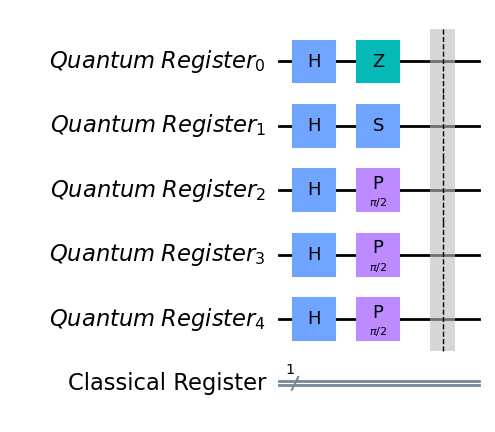

In [11]:
base_circuit.draw('mpl')

In [12]:
qc_names = [
    "P0p", "P0m", "P1p", "P1m", "P2p", "P2m", "P3p", "P3m", "P4p", "P4m", "P5p", "P5m", 
    "P6p", "P6m", "P7p", "P7m", "P8p", "P8m", "P9p", "P9m", "P10p", "P10m", "P11p", "P11m", 
    "P12p", "P12m", "P13p", "P13m", "P14p", "P14m", "P15p", "P15m", "P16p", "P16m", "P17p", 
    "P17m", "P18p", "P18m", "P19p", "P19m", "P20p", "P20m", "P21p", "P21m", "P22p", "P22m", 
    "P23p", "P23m", "P24p", "P24m", "P25p", "P25m", "P26p", "P26m", "P27p", "P27m", "P28p", 
    "P28m", "P29p", "P29m", "P30p", "P30m", "P31p", "P31m", "P32p", "P32m", "P33p", "P33m", 
    "P34p", "P34m", "P35p", "P35m", "P36p", "P36m", "P37p", "P37m", "P38p", "P38m", "P39p", 
    "P39m", "P40p", "P40m", "P41p", "P41m", "P42p", "P42m", "P43p", "P43m", "P44p", "P44m", 
    "P45p", "P45m", "P46p", "P46m", "P47p", "P47m", "P48p", "P48m", "P49p", "P49m", "P50p", 
    "P50m", "P51p", "P51m", "P52p", "P52m", "P53p", "P53m", "P54p", "P54m", "P55p", "P55m", 
    "P56p", "P56m", "P57p", "P57m", "P58p", "P58m", "P59p", "P59m", "P60p", "P60m", "P61p", 
    "P61m", "P62p", "P62m", "P63p", "P63m", "P64p", "P64m" ]


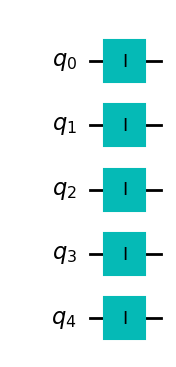

In [13]:
P0p.draw('mpl')

In [14]:
quantum_circuits = []
qcS = []
qcN= []
results = {}
for name in qc_names[46:55]:
    qc = base_circuit.copy()

    qc.append(eval(name),range(0,5))
    qcS.append(eval(name).name)
    qcN.append(name)
    
    qc.barrier()
    qc.p(np.pi/2,1)
    qc.h(1)
    qc.measure(qR[0],cR[0])
    quantum_circuits.append(qc)


In [15]:
quantum_circuits = zip(qcN, qcS, quantum_circuits)
quantum_circuits = list(quantum_circuits)


In [16]:
len(quantum_circuits)

9

In [17]:
quantum_circuits

[('P23p',
  '$P_23^{+}$',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x129a15910>),
 ('P23m',
  '$P_23^{-}$',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x129a17ed0>),
 ('P24p',
  '$P_24^{+}$',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x124ac2c10>),
 ('P24m',
  '$P_24^{-}$',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x129629090>),
 ('P25p',
  '$P_25^{+}$',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1298a2c90>),
 ('P25m',
  '$P_25^{-}$',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x12995a410>),
 ('P26p',
  '$P_26^{+}$',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1299d52d0>),
 ('P26m',
  '$P_26^{-}$',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1299d5010>),
 ('P27p',
  '$P_27^{+}$',
  <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x1296289d0>)]

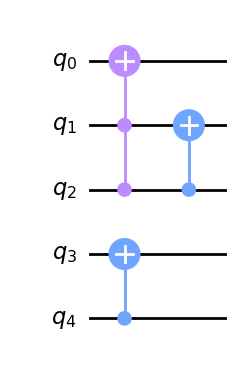

In [18]:
eval(quantum_circuits[0][0]).draw('mpl')

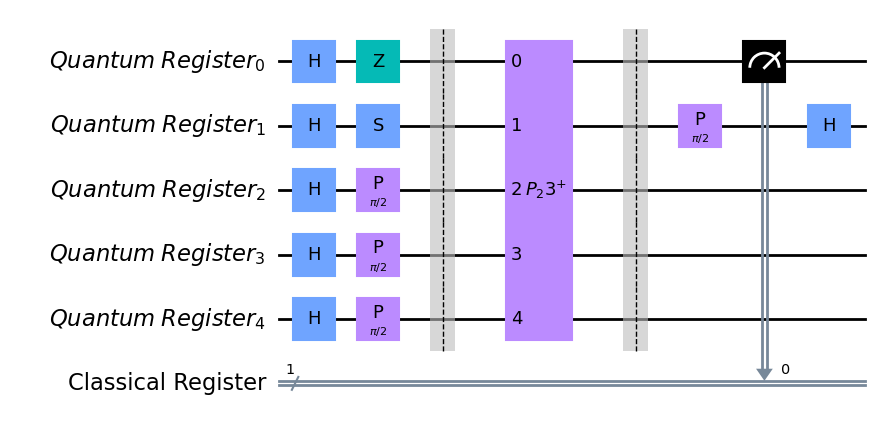

In [19]:
quantum_circuits[0][2].draw('mpl')

In [20]:
for x,y,z in quantum_circuits:
    job = execute(z, backend, shots=8192)
    result = job.result()
    results[y] = result.get_counts(z)


/var/folders/vn/5ygt8j3x24j61lcq66x89txc0000gn/T/ipykernel_15277/3453364397.py:2: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(z, backend, shots=8192)


IBMJobApiError: '\'HTTPSConnectionPool(host=\\\'api.quantum.ibm.com\\\', port=443): Max retries exceeded with url: /runtime/jobs/crkhtds82kmg008ae1f0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x129d8b210>: Failed to resolve \\\'api.quantum.ibm.com\\\' ([Errno 8] nodename nor servname provided, or not known)"))\''

In [21]:
results

{'$P_23^{+}$': {'1': 5623, '0': 2569}}